<a href="https://colab.research.google.com/github/mjavadpur/PandasNumpy/blob/main/PandasNumpy_Ses4_MJavadpur2Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
HOME = '/content/drive/MyDrive/Workshop/PandasNumpy/Session4/' #@param {type:"string"}

# Time series Analysis

Trend
& Seasonality & cyclic

stationary


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(HOME + 'Google.csv')
df = data.copy()
df

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,8/19/2004
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,8/20/2004
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,8/23/2004
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8/24/2004
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,8/25/2004
...,...,...,...,...,...,...,...
4672,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,3/13/2023
4673,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,3/14/2023
4674,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,3/15/2023
4675,96.570000,101.970001,95.870003,101.070000,101.070000,54499500,3/16/2023


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,8/19/2004
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,8/20/2004
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,8/23/2004
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8/24/2004
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,8/25/2004


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4677 non-null   float64
 1   High       4676 non-null   float64
 2   Low        4676 non-null   float64
 3   Close      4675 non-null   float64
 4   Adj Close  4677 non-null   float64
 5   Volume     4677 non-null   int64  
 6   Date       4677 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 255.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4677.000000,4676.000000,4676.000000,4675.000000,4677.000000,4.677000e+03
mean,38.255309,38.663605,37.869074,38.280917,38.265822,1.226090e+08
std,35.540477,35.943457,35.162399,35.556055,35.555944,1.529406e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.657307,12.775738,12.489810,12.649711,12.640869,2.968400e+07
50%,25.577278,25.781421,25.264660,25.543009,25.534290,6.698614e+07
75%,54.528500,55.235626,53.912251,54.548000,54.546501,1.527946e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


# **Manage Missing Values**

In [9]:
df.isnull().sum()

Open         0
High         1
Low          1
Close        2
Adj Close    0
Volume       0
Date         0
dtype: int64

In [10]:
df.interpolate(inplace = True)

In [11]:
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

<Axes: >

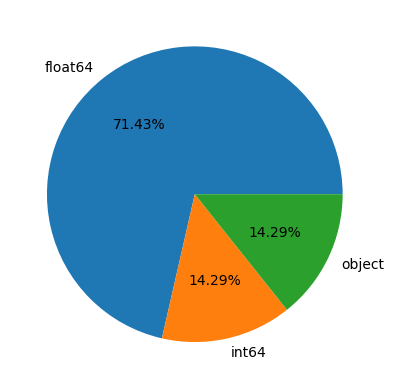

In [12]:
df.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: >

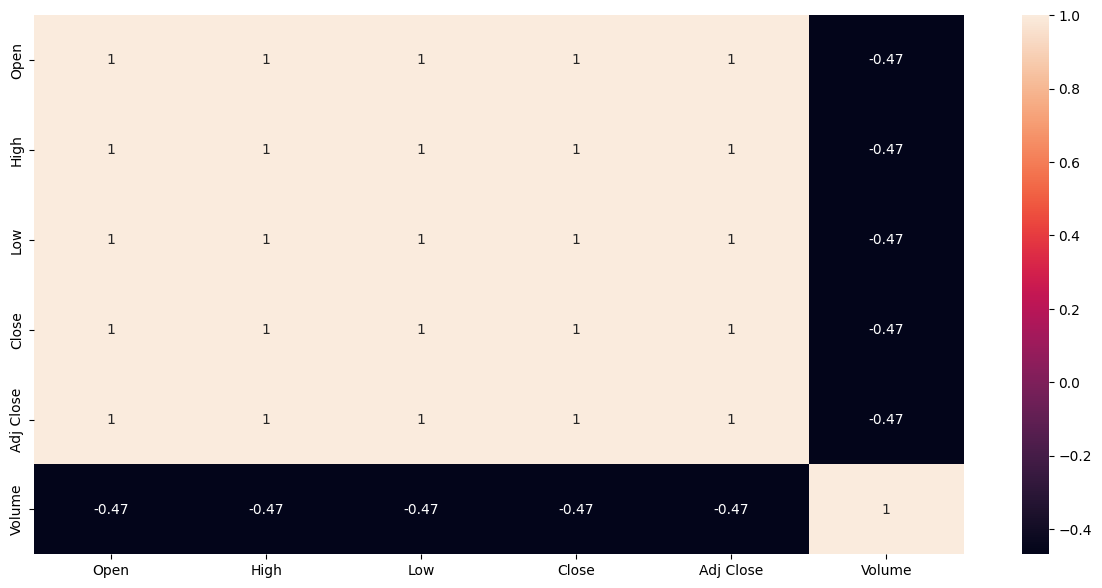

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),cbar=True,annot=True)

In [14]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999899,0.999888,0.999765,0.999765,-0.467211
High,0.999899,1.000000,0.999861,0.999888,0.999888,-0.466131
Low,0.999888,0.999861,1.000000,0.999897,0.999897,-0.468701
Close,0.999765,0.999888,0.999897,1.000000,1.000000,-0.467554
Adj Close,0.999765,0.999888,0.999897,1.000000,1.000000,-0.467554
Volume,-0.467211,-0.466131,-0.468701,-0.467554,-0.467554,1.000000


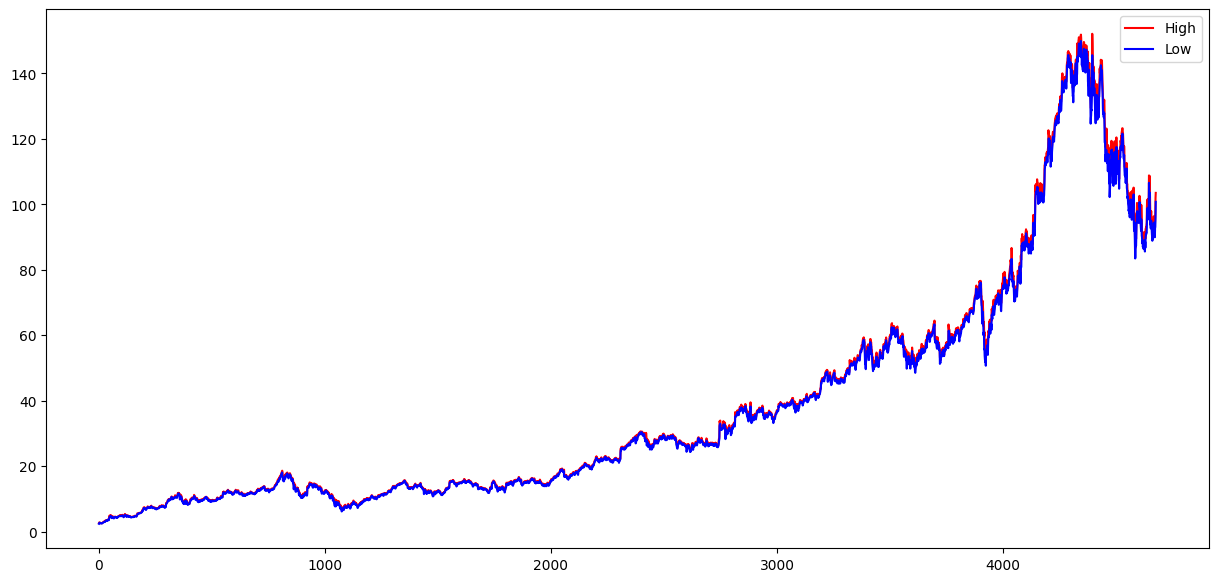

In [18]:
plt.figure(figsize=(15,7))
plt.plot(df['High'], color='r', label = 'High')
plt.plot(df['Low'], color='b', label = 'Low')
# plt.plot(df['Adj Close'], color='g', label = 'Adj Close')

plt.legend()
plt.show()

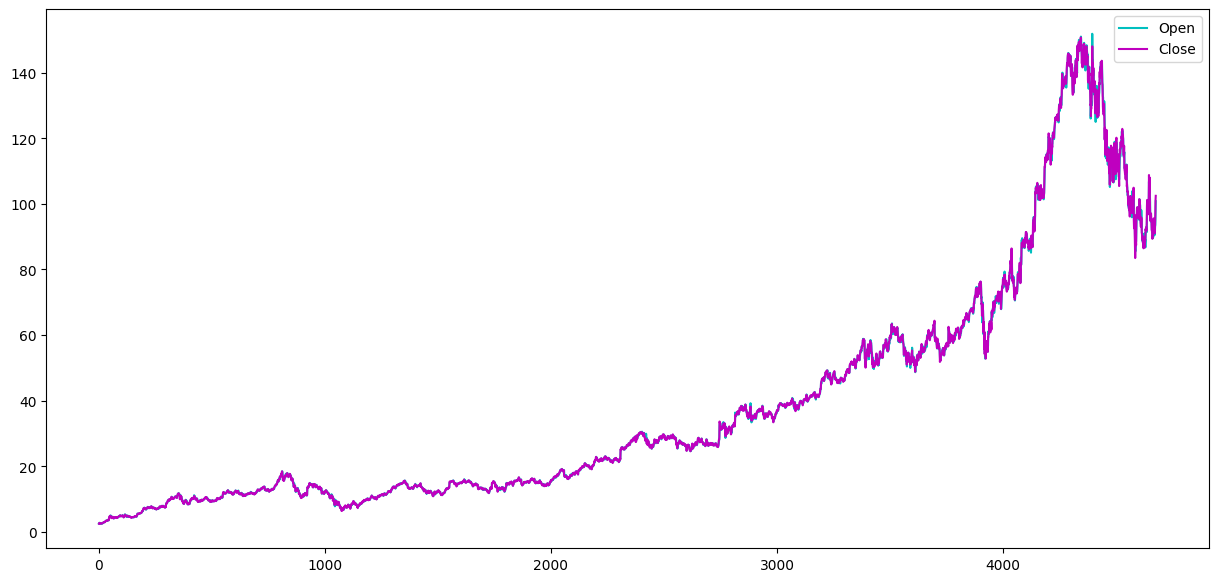

In [19]:
plt.figure(figsize=(15,7))
plt.plot(df['Open'], color='c', label = 'Open')
plt.plot(df['Close'], color='m', label = 'Close')
plt.legend()
plt.show()

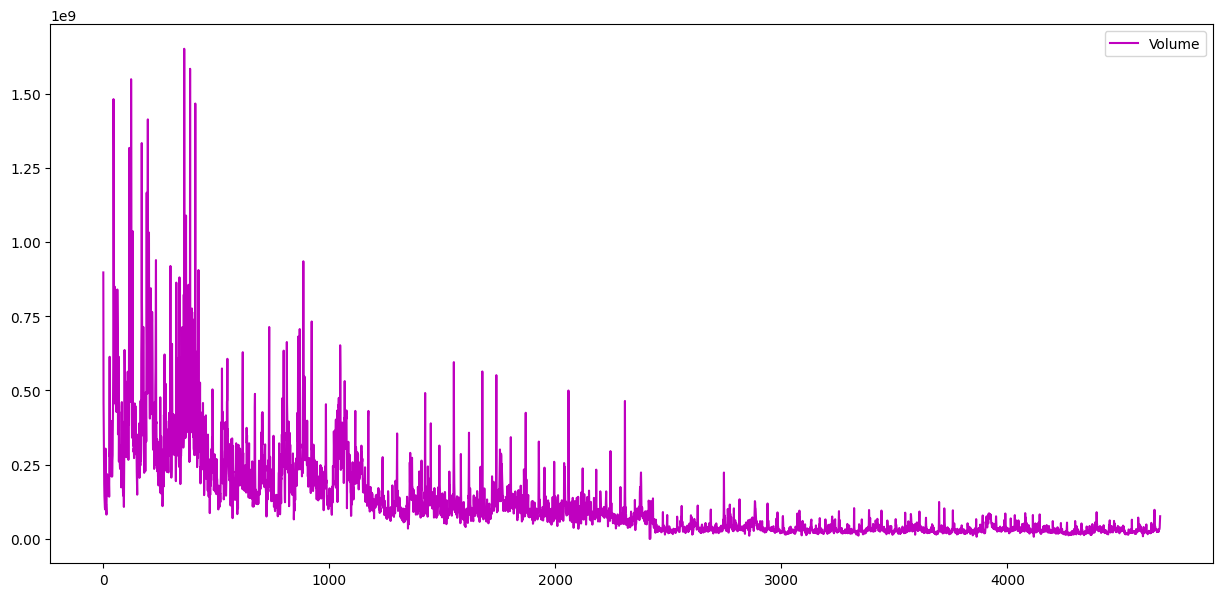

In [20]:
plt.figure(figsize=(15,7))
plt.plot(df['Volume'], color='m', label = 'Volume')
plt.legend()
plt.show()

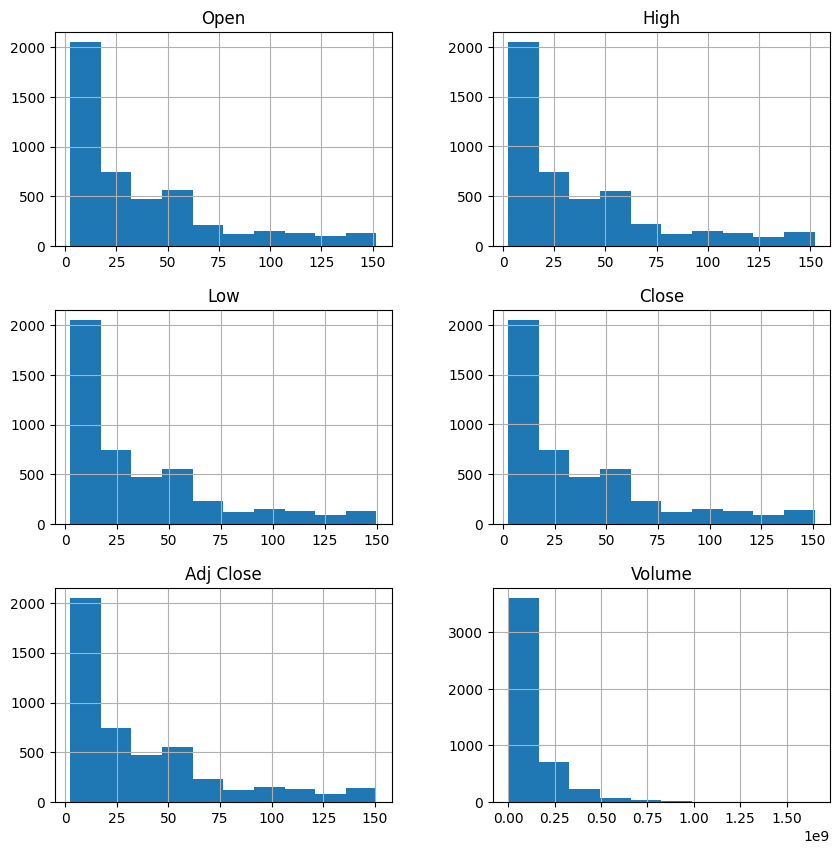

In [21]:
df.hist(figsize=(10, 10))
plt.show()

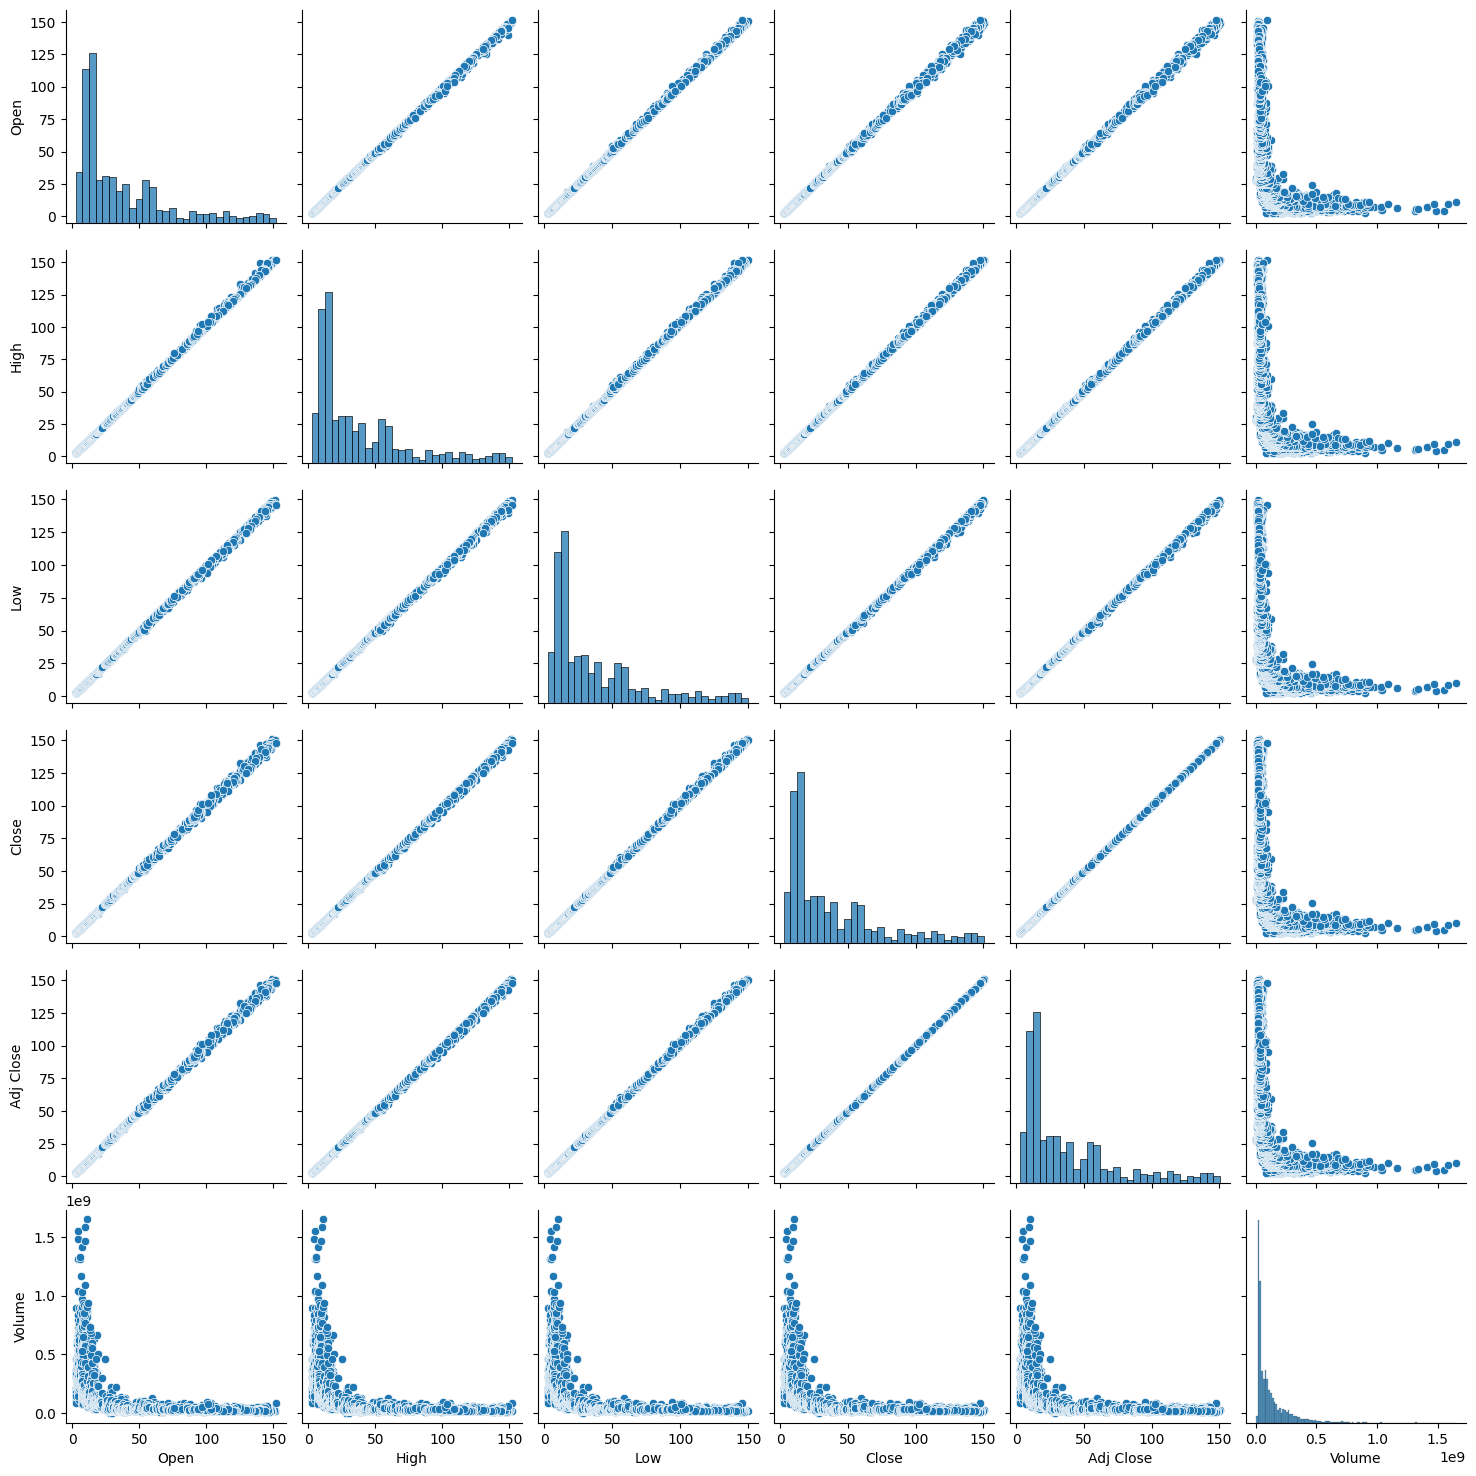

In [22]:
sns.pairplot(df)

Moving Average

https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

In [33]:
ma_tf = 20
ma = df['Adj Close'].rolling(ma_tf).mean()

In [34]:
print(ma)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4672    92.933000
4673    92.895500
4674    92.975500
4675    93.174001
4676    93.508001
Name: Adj Close, Length: 4677, dtype: float64


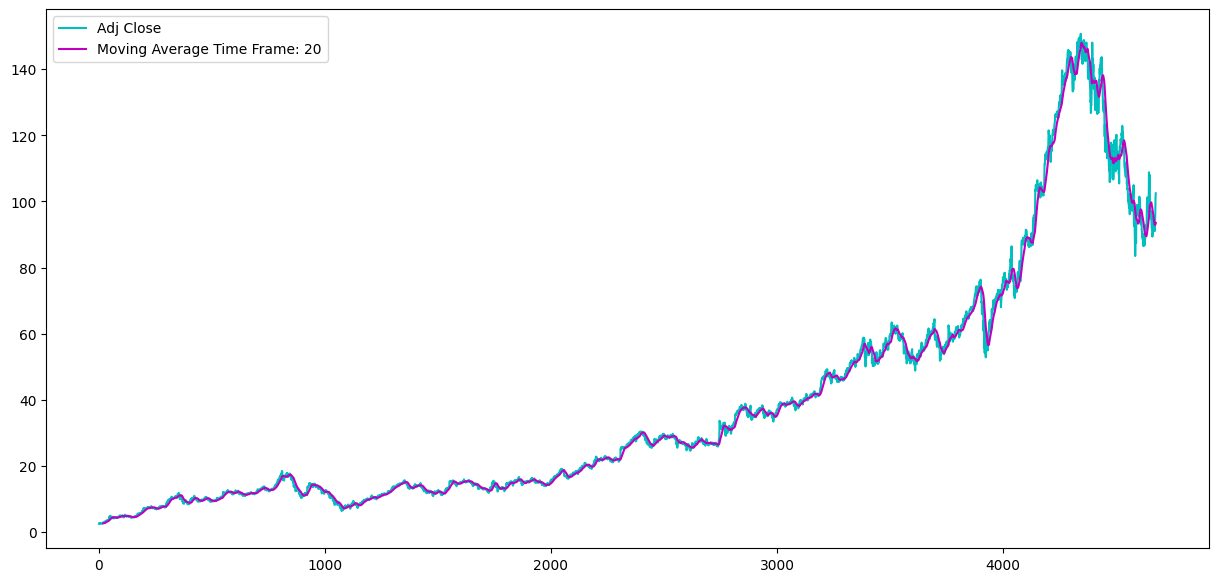

In [35]:
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Adj Close')
plt.plot(ma, color='m', label = 'Moving Average Time Frame: '+ str(ma_tf))
plt.legend()
plt.show()

In [42]:
ema_com = 0.5
ema = df['Adj Close'].ewm(com=ema_com).mean()


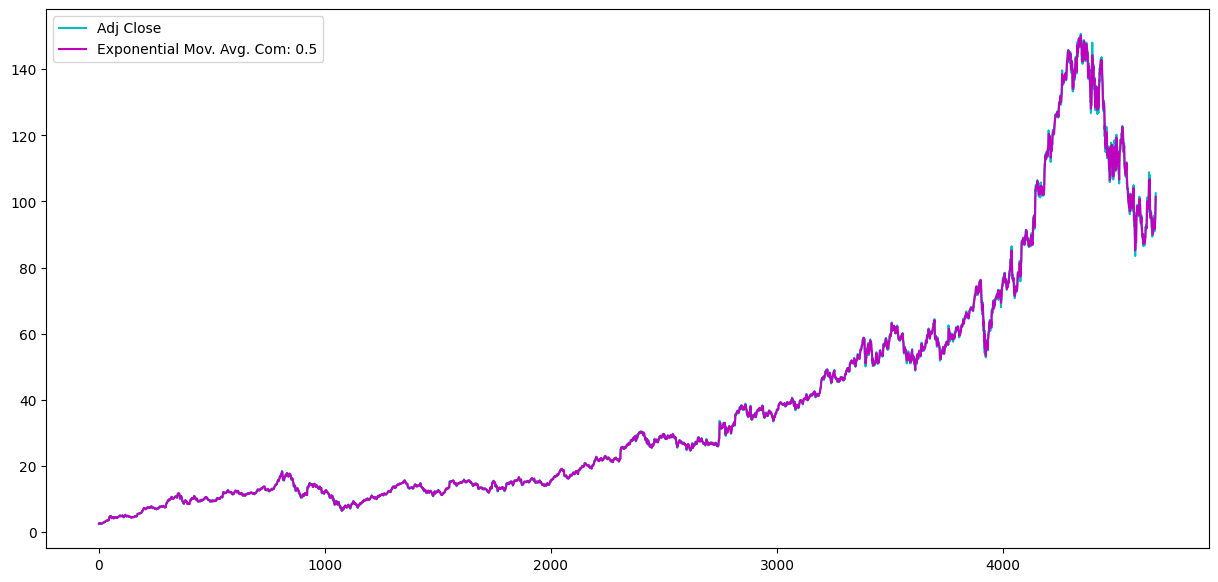

In [43]:
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], color='c', label = 'Adj Close')
plt.plot(ema, color='m', label = 'Exponential Mov. Avg. Com: ' + str(ema_com))
plt.legend()
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df['Adj Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}\n')
print(f'n_lags: {result[1]}\n')
print(f'p-value: {result[1]}\n')
for key, value in result[4].items():
    print('Critial Values:\n')
    print(f'   {key}, {value}\n')

ADF Statistic: 0.013146072166040619

n_lags: 0.9596058481939984

p-value: 0.9596058481939984

Critial Values:

   1%, -3.4317585936404296

Critial Values:

   5%, -2.8621624356024813

Critial Values:

   10%, -2.567101325023956



In [ ]:
# np.sqrt(np.log(X)).diff()

In [64]:
df['Daily Return'] = df['Adj Close'].pct_change(fill_method='bfill')

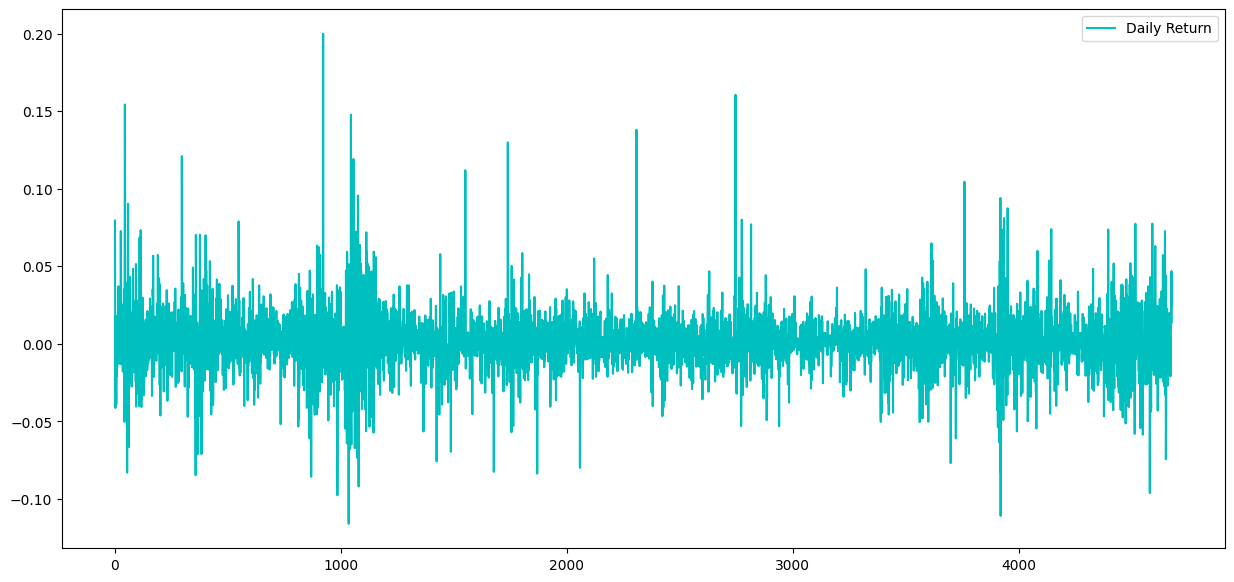

In [65]:
plt.figure(figsize=(15,7))
plt.plot(df['Daily Return'], color='c', label = 'Daily Return')
plt.legend()
plt.show()

Text(0, 0.5, 'Daily Return')

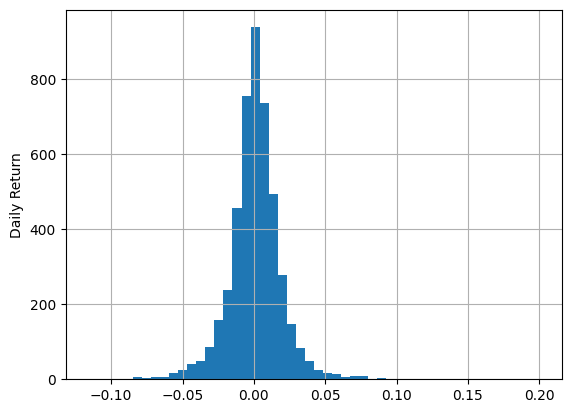

In [66]:
df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')

In [52]:
df['Date'] = pd.to_datetime(df['Date'])
data['Date'] = pd.to_datetime(data['Date'])

In [53]:
data = data.groupby(['Date']).sum()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300


In [67]:
data1 = df.set_index('Date')
data2 = data

In [68]:
data1

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
...,...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,0.007142
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,0.028257
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,0.024403


In [56]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300


In [57]:
data1.loc[data1.index.intersection(data2.index)]

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
...,...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,0.007142
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,0.028257
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,0.024403


In [58]:
data1_new = data1.loc[data1.index.intersection(data2.index)]
data2_new = data2.loc[data2.index.intersection(data1.index)]

In [59]:
data2_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300


In [60]:
total = pd.concat([data1_new, data2_new], axis = 1)

In [61]:
total

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,0.007142,90.565002,93.080002,89.940002,91.660004,91.660004,31508600
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,0.028257,93.070000,94.830002,92.779999,94.250000,94.250000,32303900
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,0.024403,93.540001,97.250000,93.040001,96.550003,96.550003,38367300


In [62]:
total2 = pd.concat([data1_new, data2_new], axis = 0)

In [63]:
total2

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
...,...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,NaN
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,NaN
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,NaN
